In [3]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


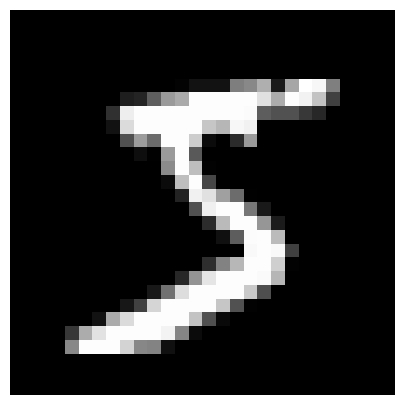

In [4]:
import  matplotlib.pyplot as plt

def plot_image(data,idx):
    plt.figure(figsize=(5,5))
    plt.imshow(data[idx], cmap='gray')
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [5]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [6]:
x_train = x_train / 255.0
x_valid = x_valid / 255.0

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [7]:
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [8]:
####Sequential API로 모델 생성 및 학습


# Sequential API를 사용해 샘플 모델 생성
model = tf.keras.Sequential([
    # Convolution 적용(32 filters)
    tf.keras.layers.Conv2D(32,(3,3), activation='relu',
                           input_shape=(28,28,1), name='conv'),
    # Max Pooling 적용                       
    tf.keras.layers.MaxPooling2D((2,2), name='pool'),
    # Classifier 출력층
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

# Sequential API를 사용하여 합성곱 레이어1개, 풀링 레이어 1개를 적용하는 간단한 모델을 만든다.
# 최종 분류기로 dense 레이어를 적용하기 위해, flatten 층을 추가하여 1차원 배열로 펼쳐준다.
# 합성곱은 Con2D 레이어를 사용하고, (3,3)크기의 서로 다른 32가지 종류의 커널을 적용한다.
# ReLU 활성화 함수를 적용한다, name속성에 레이어의 이름을 'conv'라고 지정해준다.
# 풀링레이어는 (2,2)크기로 최대 풀링(max pooling)을 적용하고, 레이어 이름 속성도 추가해준다.
# 최종 분류기는 정답 레이블이 0~9까지 10개의 값을 가지므로 노드개수를 10으로 하고,
# 분류 클래스가 10개인 다중 분류 문제이므로 활성화 함수로 softmax를 적용한다.

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 모델 훈련
history = model.fit(x_train, y_train,
                    validation_data = (x_valid_in, y_valid),
                    epochs=10)


# 앞서 정의한 모델 구조에 옵티마이저, 손실함수, 평가지표를 설정해주고 컴파일 하면 모델 인스턴스가 생성된다.
# fit()메서드에 훈련셋과 검증 셋을 인자로 주입하고, epoch 을 10으로 지정한다. 
# 코드 셀을 실행하면 모델이 학습하면서 epoch당 손실과 평가결과를 출력한다. 
# 두번째 epoch을 마친 상태에서도 훈련셋과 검증셋 모두 97%에 가까운 정확도를 보인다.

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8861 - loss: 0.3964 - val_accuracy: 0.9754 - val_loss: 0.0836
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9775 - loss: 0.0808 - val_accuracy: 0.9796 - val_loss: 0.0675
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9821 - loss: 0.0591 - val_accuracy: 0.9813 - val_loss: 0.0581
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9852 - loss: 0.0492 - val_accuracy: 0.9822 - val_loss: 0.0583
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9883 - loss: 0.0399 - val_accuracy: 0.9821 - val_loss: 0.0574
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9818 - val_loss: 0.0612
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9911 - loss: 0.0296 - val_accuracy: 0.9828 - val_loss: 0.0581
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9929 - loss: 0.0257 - 

In [10]:
model.evaluate(x_valid_in, y_valid)

# evaluate() 메서드를 모델 인스턴스에 적용하면 모델의 학습된 가중치를 사용하여 손실과 평가지표를 계산해준다.
# 검증 셋에 대해서 약 98%의 정확도를 보여준다.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9786 - loss: 0.0775


[0.06010562181472778, 0.9830999970436096]

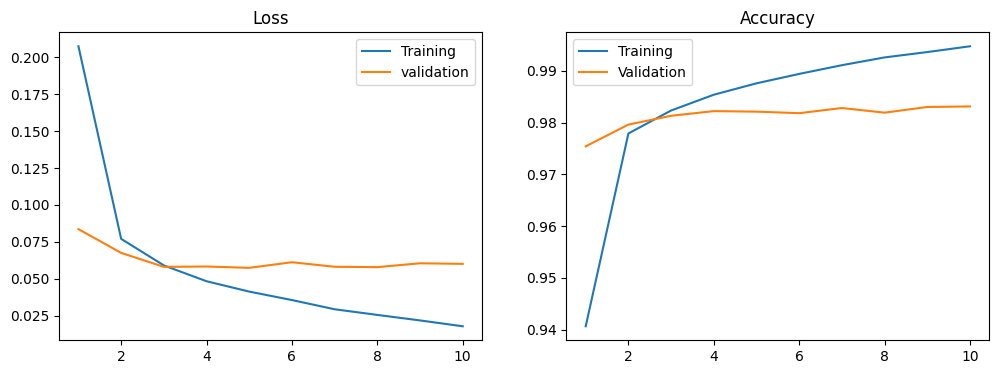

In [11]:
def plot_loss_acc(history, epoch):

    loss,val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']

    fig, axes = plt.subplots(1,2,figsize=(12, 4))

    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')

    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')

    plt.show()


plot_loss_acc(history,10)

# 모델 훈련단계에서 훈련결과를 history 객체에 저장해 두었다. 
# 10 epoch 동안 모델의 예측 오차와 정확도를 그래프로 그리는 함수를 정의하고 실행한다.
# 그래프를 보면 훈련셋에 대한 손실은 계속 줄어드는데, 검증셋의 손실은 어느수준에서 더이상 낮아지지 않는다.
# 4 epoch 이후부터는 모델이 과대적합으로 진행되었다는 것을 알수있다.

In [12]:
# 모델 구조
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv (Conv2D)                   │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool (MaxPooling2D)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        54,090 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 163,232 (637.63 KB)

 Trainable params: 54,410 (212.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,822 (425.09 KB)

In [13]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor>]

In [14]:
model.outputs

[<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_4>]

In [15]:
model.layers

[<Conv2D name=conv, built=True>,
 <MaxPooling2D name=pool, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>]

In [16]:
model.layers[0]

<Conv2D name=conv, built=True>

In [17]:
model.layers[0].input

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor>

In [18]:
model.layers[0].output

<KerasTensor shape=(None, 26, 26, 32), dtype=float32, sparse=False, name=keras_tensor_1>

In [19]:
model.layers[0].weights

[<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential/conv/kernel>,
 <KerasVariable shape=(32,), dtype=float32, path=sequential/conv/bias>]

In [20]:
model.layers[0].kernel

<KerasVariable shape=(3, 3, 1, 32), dtype=float32, path=sequential/conv/kernel>

In [21]:
model.layers[0].bias

<KerasVariable shape=(32,), dtype=float32, path=sequential/conv/bias>

In [22]:
model.get_layer('conv')

<Conv2D name=conv, built=True>

In [24]:
activator = tf.keras.Model(inputs=model.inputs,
                           outputs=[layer.output for layer in model.layers[:2]])
activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


2

In [26]:
conv_activation = activations[0]
conv_activation.shape

(1, 26, 26, 32)

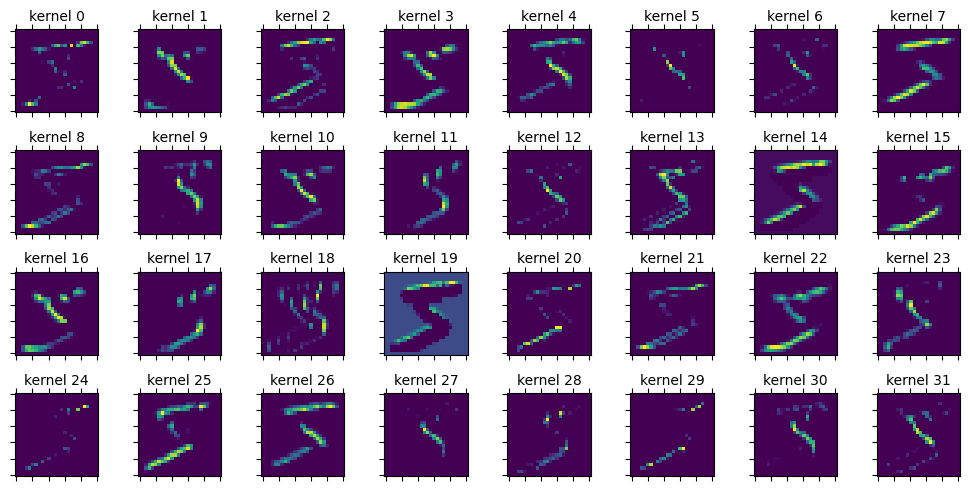

In [28]:
# convolution 시각화

fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(conv_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [29]:
pooling_activation = activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


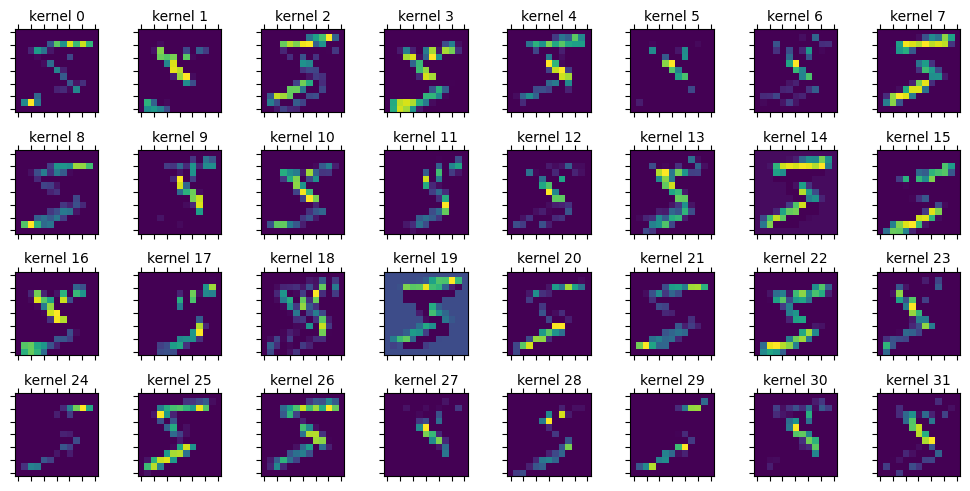

In [30]:
# convolution 시각화

fig, axes = plt.subplots(4,8)
fig.set_size_inches(10,5)

for i in range(32):
    axes[i//8, i%8].matshow(pooling_activation[0,:,:,i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()